# Protocol test

# for protocol test

In [1]:
import numpy as np
from sus.protocol_designer import System, Protocol, Potential, Compound_Protocol
from sus.protocol_designer.protocol import sequential_protocol
from IPython.display import HTML
from quick_sim import setup_sim
from edward_tools.coupled_fq_potential import coupled_flux_qubit_pot, coupled_flux_qubit_force, coupled_fq_pot
from edward_tools import cfq_runner as coupled_fq_runner
from edward_tools.visualization import animate_sim_flux_qubit

import kyle_tools as kt
import matplotlib.pyplot as plt
import importlib
from edward_tools import coupled_fq_protocol_library, cfq_runner

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
I_p_1 = 2e-6       # Amp
I_p_2 = 2e-6       # Amp
I_m_1 = 7e-9       # Amp
I_m_2 = 7e-9       # Amp
R_1 = 371          # ohm
R_2 = 500          # ohm
C_1 = 4e-9         # F
C_2 = 5e-9         # F
L_1 = 1e-9         # H
L_2 = 1e-9         # H

M_12_factor = 0
M_12 = L_1 * L_2 * M_12_factor
PHI_0 = 2.067833848 * 1e-15



quick_doubler = lambda x1, x2: np.hstack([np.array([x1] * 2), np.array([x2]*2)])

I_p = quick_doubler(I_p_1, I_p_2)
I_m = quick_doubler(I_m_1, I_m_2)
R = quick_doubler(R_1, R_2)
L = quick_doubler(L_1, L_2)
C = quick_doubler(C_1, C_2)

m = np.array([1, 1/4, 1, 1/4])
nu = np.array([2, 1/2, 2, 1/2]) 
kepa = np.array([1, 1, 1, 1])


beta_1 = 2 * np.pi * L_1 * I_p_1 / PHI_0
beta_2 = 2 * np.pi * L_2 * I_p_2 / PHI_0

d_beta_1 = 2 * np.pi * L_1 * I_m_1 / PHI_0
d_beta_2 = 2 * np.pi * L_2 * I_m_2 / PHI_0



_lambda = np.sqrt(L*C)/(R*C)  * nu
_theta  = 1 / m
_eta = np.sqrt(_lambda * kepa / m)


_lambda = 1
_theta  = 10
_eta = 1

params = {}
params['N'] = 10_000
params['dt'] = 1/1_000
params['lambda'] = 1
params['beta'] = 1
params['sim_params'] = [_lambda, _theta, _eta]
params['tau'] = 40
params['target_work'] = None

In [3]:
from edward_tools import coupled_fq_protocol_library
coupled_fq_protocol_library = importlib.reload(coupled_fq_protocol_library)
create_system = coupled_fq_protocol_library.create_system
get_potential_shot_at_different_t = coupled_fq_protocol_library.get_potential_shot_at_different_t
customizedProtocol = coupled_fq_protocol_library.customizedProtocol

In [159]:
protocol_list = [
    {"duration": 10, "phi_1_x": 2, "phi_2_x": 5, "M_12": 1},
    {"duration": 10, "phi_1_x": 2, "phi_2_x": 1, "M_12": 0.5},
    {"duration": 10, "phi_1_dcx": 3},
    {"duration": 10, "phi_1_dcx": 0},
]


# Example 1: 4 Well potential
- problem: How to keep phi_1dc and phi_1dcx close?

In [10]:
manual_domain=[[-5, -5], [5, 5]]
phi_1_dcx = 3
 = 3
phi_1_dc = 1
phi_2_dc = 1
gamma = 10
d_beta_1, d_beta_2 = 0, 0


initial_parameter_dict = {
        "U0_1": 1,     "U0_2": 1,     "gamma_1": gamma,  "gamma_2": gamma,
        "beta_1": beta_1,   "beta_2": beta_2,   "d_beta_1": d_beta_1 ,   "d_beta_2": d_beta_2,
        "phi_1_x": 0,  "phi_2_x": 0,  "phi_1_dcx": phi_1_dcx,  "phi_2_dcx": phi_2_dcx,
        "M_12": 0
}

protocol_list = [
    {"duration": 10, "M_12": 0.5}
]

computation_protocol_parameter_dict = coupled_fq_protocol_library.customizedProtocol(initial_parameter_dict, protocol_list)
storage_protocol, comp_protocol = create_system(computation_protocol_parameter_dict)
cfqr = coupled_fq_runner.coupledFluxQubitRunner(params = params, storage_protocol= storage_protocol, \
                                computation_protocol= comp_protocol)
cfqr.initialize_sim()


{'M_12': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]}


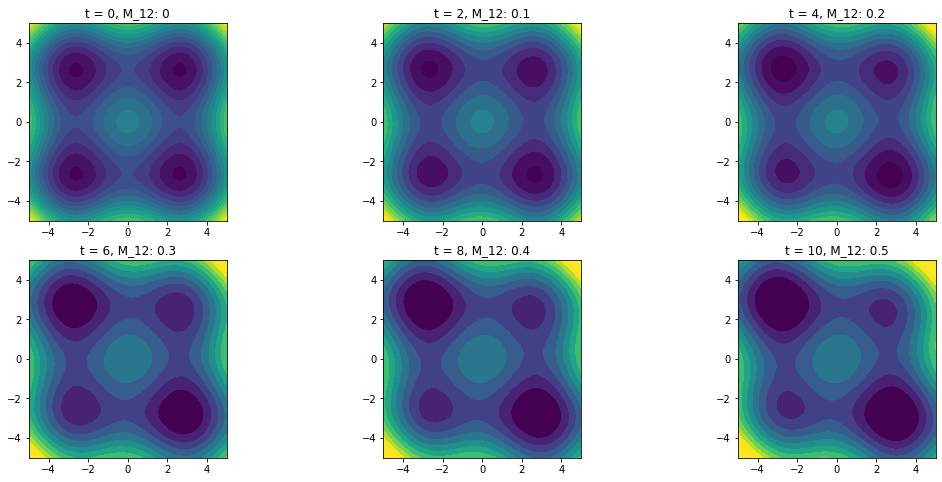

In [11]:
vmin,vmax  = 0, 100
vmin, vmax = None, None
get_potential_shot_at_different_t(cfqr, computation_protocol_parameter_dict, axis1 = 0, axis2 = 1,\
                                  manual_domain=manual_domain, timeStep = 2,
                                  slice_values = [0, 0, phi_1_dc, phi_2_dc], surface=False, contours = 15,
                                  vmin = vmin, vmax = vmax
                                  )